# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
import os

In [4]:
os.environ["AWS_SHARED_CREDENTIALS_FILE"] = "/srv/keys/credentials"

In [5]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data



**Step 1:** Read the data CSV from your s3 bucket

In [6]:
df = pd.read_csv("s3://mds-s3-17-ruslan/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [7]:
## Use your ML skills to get from step 1 to step 6

**Step 2:** Drop rows with nans

In [8]:
df.dropna(inplace=True)

**Step 3:** Split data into train and test portions

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

**Step 4:** Carry out EDA of your choice on the train split

In [10]:
import seaborn as sns

In [23]:
# Double check for nans
train_df.isna().sum()

ACCESS-CM2          0
ACCESS-ESM1-5       0
AWI-ESM-1-1-LR      0
BCC-CSM2-MR         0
BCC-ESM1            0
CMCC-CM2-HR4        0
CMCC-CM2-SR5        0
CMCC-ESM2           0
CanESM5             0
EC-Earth3-Veg-LR    0
FGOALS-g3           0
GFDL-CM4            0
INM-CM4-8           0
INM-CM5-0           0
KIOST-ESM           0
MIROC6              0
MPI-ESM-1-2-HAM     0
MPI-ESM1-2-HR       0
MPI-ESM1-2-LR       0
MRI-ESM2-0          0
NESM3               0
NorESM2-LM          0
NorESM2-MM          0
SAM0-UNICON         0
TaiESM1             0
observed            0
dtype: int64

In [12]:
# Quick overview of data
train_df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1904-07-25,1.512182,0.000584,1.856055e+00,0.000046,0.789729,0.181330,5.100739,0.012483,4.412220,4.456043e-01,...,10.478529,8.938193e-01,1.180564e-13,1.446929e-02,6.415945e-03,1.640484e-01,0.017184,1.107937e-09,0.050406,1.635977
1995-09-30,12.631815,0.139459,1.321768e-13,0.068034,8.858702,0.027318,13.128106,4.716581,1.170598,2.236223e+00,...,0.006613,1.186417e-13,4.974224e-01,9.310009e-02,1.735556e-13,6.687871e+00,0.274215,2.668063e+00,0.000000,0.001470
1948-12-18,11.237302,0.000213,8.445518e+00,0.136639,2.237711,0.255595,11.567399,0.100391,0.002123,5.910444e+00,...,0.004257,1.204995e-13,1.121546e+01,1.297502e-07,2.473611e-08,1.205626e-01,0.000025,2.977328e-02,0.002806,0.030878
1987-04-16,0.064425,12.462972,1.339738e-01,28.240216,9.786378,15.616397,0.004702,13.422941,0.071143,7.007121e-01,...,0.310881,4.023314e-04,2.368464e+00,1.225945e-05,4.045187e+00,2.244482e-09,1.456210,5.544500e+00,2.181402,1.327919
2001-09-19,0.158443,0.500666,9.855369e-14,0.053929,0.006041,0.277067,0.001157,0.936166,0.370939,-6.665427e-20,...,0.000254,1.175294e-13,4.346637e-01,2.128730e-18,1.527342e-13,5.599756e-02,0.596161,4.774314e-03,2.983357,0.006615


In [13]:
# Review types of data and number of values in the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36816 entries, 1904-07-25 to 1932-01-22
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36816 non-null  float64
 1   ACCESS-ESM1-5     36816 non-null  float64
 2   AWI-ESM-1-1-LR    36816 non-null  float64
 3   BCC-CSM2-MR       36816 non-null  float64
 4   BCC-ESM1          36816 non-null  float64
 5   CMCC-CM2-HR4      36816 non-null  float64
 6   CMCC-CM2-SR5      36816 non-null  float64
 7   CMCC-ESM2         36816 non-null  float64
 8   CanESM5           36816 non-null  float64
 9   EC-Earth3-Veg-LR  36816 non-null  float64
 10  FGOALS-g3         36816 non-null  float64
 11  GFDL-CM4          36816 non-null  float64
 12  INM-CM4-8         36816 non-null  float64
 13  INM-CM5-0         36816 non-null  float64
 14  KIOST-ESM         36816 non-null  float64
 15  MIROC6            36816 non-null  float64
 16  MPI-ESM-1-2-HAM   36816

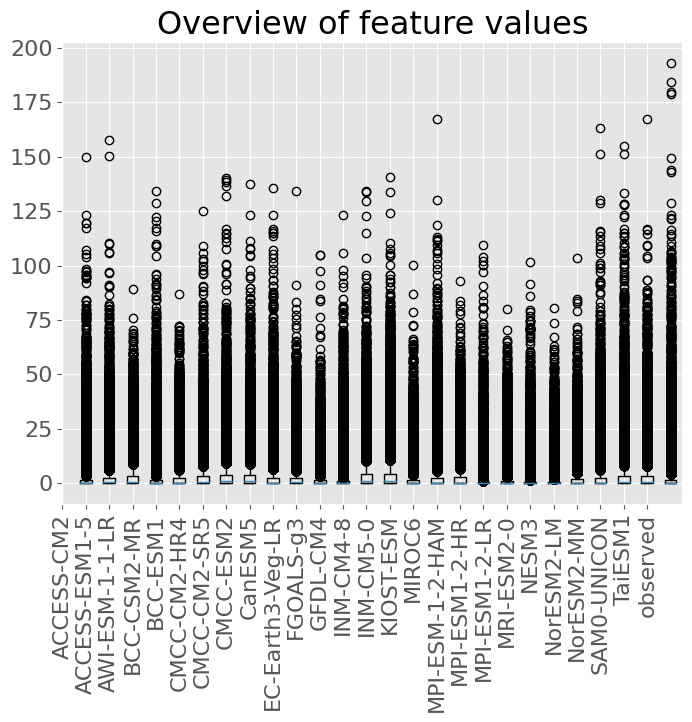

In [14]:
plt.boxplot(train_df.values)
plt.xticks(range(len(train_df.columns)), train_df.columns, rotation=90)
plt.title("Overview of feature values")
plt.show()

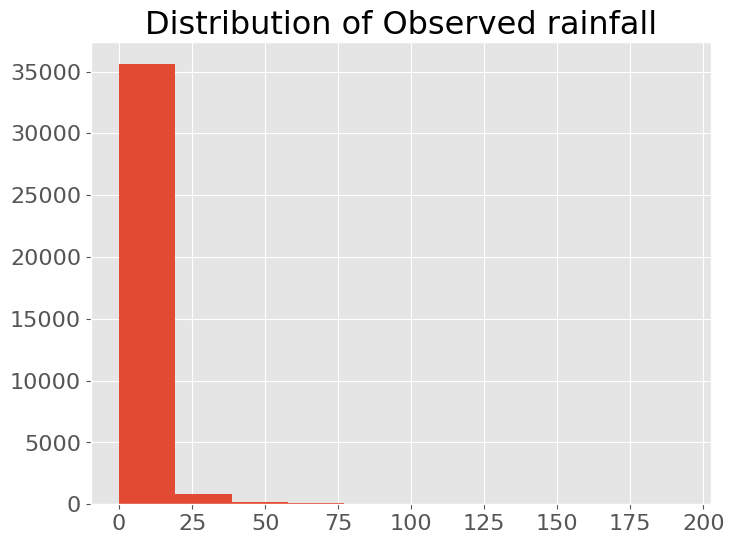

In [15]:
# Plot distribution of Observed
plt.hist(train_df["observed"])
plt.title("Distribution of Observed rainfall")
plt.show()

**Step 5** : Train ensemble machine learning model using RandomForestRegressor and
evaluate with metric of your choice (e.g., RMSE) by considering Observed as the target column.

In [16]:
# Set up Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=123)

# Set up X_train and X_train
X_train = train_df.drop(columns=["observed"])
y_train = train_df["observed"]

# Set up X_test and y_test
X_test = test_df.drop(columns=["observed"])
y_test = test_df["observed"]



In [17]:
# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 8.722


**Step 6:** Discuss your results. Are you getting better results with ensemble models compared to the individual climate models?

In [18]:
# Compute RMSE for all columns vs "observed"
rmse_results = {}
for column in df.columns:
    if column != "observed":
        rmse = np.sqrt(mean_squared_error(df["observed"], df[column]))
        rmse_results[column] = rmse

# Print the results
for column, rmse in rmse_results.items():
    print(f"{column}: {rmse:.3f}")

ACCESS-CM2: 10.662
ACCESS-ESM1-5: 10.653
AWI-ESM-1-1-LR: 10.900
BCC-CSM2-MR: 10.389
BCC-ESM1: 10.182
CMCC-CM2-HR4: 10.411
CMCC-CM2-SR5: 11.045
CMCC-ESM2: 10.821
CanESM5: 10.689
EC-Earth3-Veg-LR: 10.016
FGOALS-g3: 9.367
GFDL-CM4: 10.016
INM-CM4-8: 11.161
INM-CM5-0: 11.751
KIOST-ESM: 9.278
MIROC6: 11.258
MPI-ESM-1-2-HAM: 10.678
MPI-ESM1-2-HR: 9.589
MPI-ESM1-2-LR: 9.800
MRI-ESM2-0: 9.672
NESM3: 9.496
NorESM2-LM: 10.018
NorESM2-MM: 10.734
SAM0-UNICON: 11.390
TaiESM1: 11.113


**Evaluation of results**

RandomForestRegressor (RFR) achieved better results when evaluating all columns as training data.  The RMSE achieved by RFR was 8.8 while the RMSE computed on every column in the dataset vs the column "Observed" ranged between 9.3 for KIOST-ESM up to 11.8 for INM-CM5-0

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [19]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=123)

In [20]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.93
 Test RMSE: 8.51


In [21]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.